In [1]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# importing the dataset from the csv file in /data 
df = pd.read_csv('./data/train.csv')
df.head()

dftest = pd.read_csv('./data/test.csv')
dftest.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,id
0,66149,0.352453,0.079074,0.049762,0.000113,2182.571837,1.068958e+06,2793.933194,365598.217794,4882.736629,...,54.443741,-7.310032,54.092850,-3.083705,21.973936,-6.226634,47.559479,-10.531331,40.015507,9586
1,66149,0.478756,0.087817,0.161004,0.006013,2377.436870,4.982766e+05,2238.413578,145786.540526,4952.139799,...,68.952118,-5.488387,47.951576,4.220189,54.550598,-1.984476,83.323364,1.572527,59.916058,6984
2,66149,0.329632,0.076669,0.191606,0.000796,2525.119913,1.121766e+05,2472.943874,152231.535952,5245.819561,...,34.014881,-2.187970,48.011997,-5.302452,20.189150,-1.775238,33.344528,-1.861419,39.216839,7047
3,66149,0.302360,0.092979,0.106443,0.001762,1609.587478,1.552065e+05,2010.500266,66792.319500,3505.274189,...,61.442478,-7.453752,63.574467,6.466436,26.298433,-4.502402,47.922512,-4.084498,32.702728,2510
4,66149,0.400731,0.090858,0.125889,0.006567,1235.357695,2.267020e+05,1739.174077,218522.407816,2733.308857,...,48.944210,-2.122545,53.329845,-2.181120,41.637207,-3.361829,46.104019,-2.228968,30.943306,34


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8991 entries, 0 to 8990
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 8991 non-null   object 
 1   length                   8991 non-null   int64  
 2   chroma_stft_mean         8991 non-null   float64
 3   chroma_stft_var          8991 non-null   float64
 4   rms_mean                 8991 non-null   float64
 5   rms_var                  8991 non-null   float64
 6   spectral_centroid_mean   8991 non-null   float64
 7   spectral_centroid_var    8991 non-null   float64
 8   spectral_bandwidth_mean  8991 non-null   float64
 9   spectral_bandwidth_var   8991 non-null   float64
 10  rolloff_mean             8991 non-null   float64
 11  rolloff_var              8991 non-null   float64
 12  zero_crossing_rate_mean  8991 non-null   float64
 13  zero_crossing_rate_var   8991 non-null   float64
 14  harmony_mean            

In [4]:
genres_list = [
    'blues',
    'classical',
    'country',
    'disco',
    'hiphop',
    'jazz',
    'metal',
    'pop',
    'reggae',
    'rock'
]


In [5]:
df['target'] = df['label'].apply(lambda x: genres_list.index(x))
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label,target
0,pop.00072.5.wav,66149,0.464264,0.079744,0.228116,0.007791,2156.231325,333455.342337,2295.327890,301528.295866,...,0.587634,44.336262,3.168914,31.690376,0.719836,50.416603,-3.192938,25.115688,pop,7
1,jazz.00038.9.wav,66149,0.254604,0.090115,0.075960,0.002236,1439.715643,68955.697954,1532.279764,78968.523547,...,-0.706779,105.123726,2.879812,157.346725,3.201282,71.674042,-1.664307,53.640949,jazz,5
2,disco.00055.3.wav,66149,0.488070,0.065943,0.119709,0.001558,2049.831819,132030.817465,2043.472368,71699.726714,...,-4.570374,24.995367,-0.735507,33.519482,-2.301054,38.444759,6.482006,50.393089,disco,3
3,rock.00025.9.wav,66149,0.440747,0.071972,0.108535,0.001491,2237.056815,129862.001264,2070.706749,62747.206984,...,-5.574619,29.497013,3.903063,18.930311,-2.205716,26.832264,0.551784,25.199505,rock,9
4,jazz.00013.4.wav,66149,0.369718,0.090648,0.052010,0.000124,1775.591113,66645.168399,2351.155395,51753.800714,...,-3.686353,47.710155,3.593751,70.004326,0.011506,85.980957,1.892704,108.339722,jazz,5


In [6]:
df1 = df[df.label =='pop']
df2 = df[df.label =='metal']

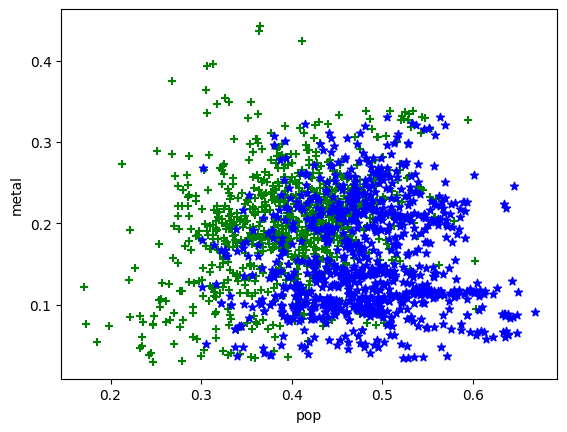

In [7]:
plt.xlabel('pop')
plt.ylabel('metal')
plt.scatter(df1['chroma_stft_mean'],df1['rms_mean'],color='green',marker='+')
plt.scatter(df2['chroma_stft_mean'],df2['rms_mean'],color='blue',marker='*')

In [8]:
X = df.drop(['filename','length','label','target'],axis='columns')
X.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.464264,0.079744,0.228116,0.007791,2156.231325,333455.342337,2295.327890,301528.295866,4463.253268,2.718348e+06,...,2.309055,36.512493,0.587634,44.336262,3.168914,31.690376,0.719836,50.416603,-3.192938,25.115688
1,0.254604,0.090115,0.075960,0.002236,1439.715643,68955.697954,1532.279764,78968.523547,2657.114446,5.030357e+05,...,-1.096684,29.887444,-0.706779,105.123726,2.879812,157.346725,3.201282,71.674042,-1.664307,53.640949
2,0.488070,0.065943,0.119709,0.001558,2049.831819,132030.817465,2043.472368,71699.726714,4320.802847,6.807394e+05,...,4.933163,29.158789,-4.570374,24.995367,-0.735507,33.519482,-2.301054,38.444759,6.482006,50.393089
3,0.440747,0.071972,0.108535,0.001491,2237.056815,129862.001264,2070.706749,62747.206984,4502.841233,5.672063e+05,...,3.557746,33.833458,-5.574619,29.497013,3.903063,18.930311,-2.205716,26.832264,0.551784,25.199505
4,0.369718,0.090648,0.052010,0.000124,1775.591113,66645.168399,2351.155395,51753.800714,4473.191669,9.175494e+05,...,13.952731,48.042686,-3.686353,47.710155,3.593751,70.004326,0.011506,85.980957,1.892704,108.339722


In [9]:
Y = df['target']
Y.head()

0    7
1    5
2    3
3    9
4    5
Name: target, dtype: int64

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
n_components=20
pca = PCA(n_components=n_components)

scaler.fit(X)
X = scaler.fit_transform(X)
X=pca.fit_transform(X)

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [12]:
model = svm.SVC(kernel = 'rbf' , gamma='auto')

In [13]:
X_train.shape

(7192, 20)

In [14]:
Y_train.shape

(7192,)

In [15]:
model.fit(X_train,Y_train)

SVC(gamma='auto')

In [16]:
model.score(X_test,Y_test)

0.8249027237354085

In [17]:
df = pd.read_csv('./data/test.csv')
df.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,id
0,66149,0.352453,0.079074,0.049762,0.000113,2182.571837,1.068958e+06,2793.933194,365598.217794,4882.736629,...,54.443741,-7.310032,54.092850,-3.083705,21.973936,-6.226634,47.559479,-10.531331,40.015507,9586
1,66149,0.478756,0.087817,0.161004,0.006013,2377.436870,4.982766e+05,2238.413578,145786.540526,4952.139799,...,68.952118,-5.488387,47.951576,4.220189,54.550598,-1.984476,83.323364,1.572527,59.916058,6984
2,66149,0.329632,0.076669,0.191606,0.000796,2525.119913,1.121766e+05,2472.943874,152231.535952,5245.819561,...,34.014881,-2.187970,48.011997,-5.302452,20.189150,-1.775238,33.344528,-1.861419,39.216839,7047
3,66149,0.302360,0.092979,0.106443,0.001762,1609.587478,1.552065e+05,2010.500266,66792.319500,3505.274189,...,61.442478,-7.453752,63.574467,6.466436,26.298433,-4.502402,47.922512,-4.084498,32.702728,2510
4,66149,0.400731,0.090858,0.125889,0.006567,1235.357695,2.267020e+05,1739.174077,218522.407816,2733.308857,...,48.944210,-2.122545,53.329845,-2.181120,41.637207,-3.361829,46.104019,-2.228968,30.943306,34


In [18]:
y_pred = model.predict(X_test)

In [19]:
y_pred

array([1, 8, 9, ..., 2, 7, 8], dtype=int64)

In [20]:
accuracy_score(Y_test,y_pred)

0.8249027237354085

In [21]:
def submission(model):
    df = pd.read_csv('./data/test.csv')
    X = df.drop(['length', 'id'], axis='columns')
    IDS = df['id']
    scaler = StandardScaler()
    n_components = 20
    pca = PCA(n_components=n_components)

    scaler.fit(X)
    X = scaler.fit_transform(X)
    X = pca.fit_transform(X)

    y_prediction = model.predict(X)

    # Convert the NumPy array y_prediction to a pandas Series
    y_prediction_series = pd.Series(y_prediction)

    df_ans = pd.concat([IDS, y_prediction_series], axis=1)
    df_ans.to_csv('output.csv', index=False)

submission(model)
